In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns;sns.set(color_codes=True)
import numpy as np
color = sns.color_palette("tab10")


In [2]:
df_red = pd.read_csv("data/wine_final_red_todo.csv")
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,tipo_calidad,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Mediana,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Mediana,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Mediana,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Mediana,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Mediana,red


In [14]:
red_analysis = pd.DataFrame(data=df_red, 
                            columns = ['density', 'fixed acidity', 'residual sugar','alcohol','quality', 'tipo_calidad'])
red_analysis.head(10)

,density,fixed acidity,residual sugar,alcohol,quality,tipo_calidad
0,0.9978,7.4,1.9,9.4,5,Mediana
1,0.9968,7.8,2.6,9.8,5,Mediana
2,0.9970,7.8,2.3,9.8,5,Mediana
3,0.9980,11.2,1.9,9.8,6,Mediana
4,0.9978,7.4,1.9,9.4,5,Mediana
5,0.9978,7.4,1.8,9.4,5,Mediana
6,0.9964,7.9,1.6,9.4,5,Mediana
7,0.9946,7.3,1.2,10.0,7,Buena
8,0.9968,7.8,2.0,9.5,7,Buena
9,0.9959,6.7,1.8,9.2,5,Mediana


Figure 8: Correlación usando el mapa de calor de Seaborn


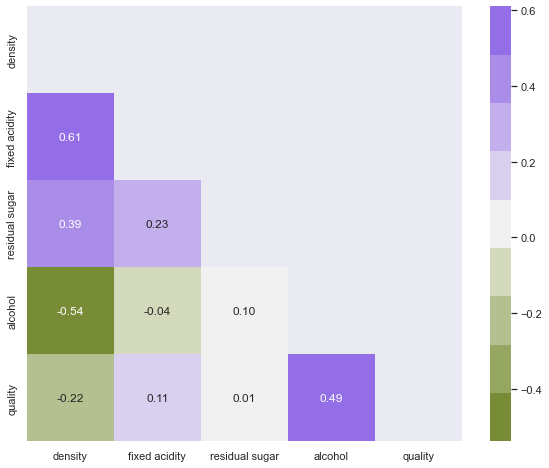

In [4]:
sns.set_style("dark")
plt.figure(figsize = (10,8))
sns.set_context("notebook", font_scale= 1.0)
column = red_analysis.columns.tolist()
mcorr = red_analysis[column].corr()
mask = np.zeros_like(mcorr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap=sns.diverging_palette(100, 275, s=80, l=55, n=9)
g = sns.heatmap(mcorr, mask=mask, cmap=cmap, square=True, annot=True, fmt='0.2f')
print("Figure 8: Correlación usando el mapa de calor de Seaborn")

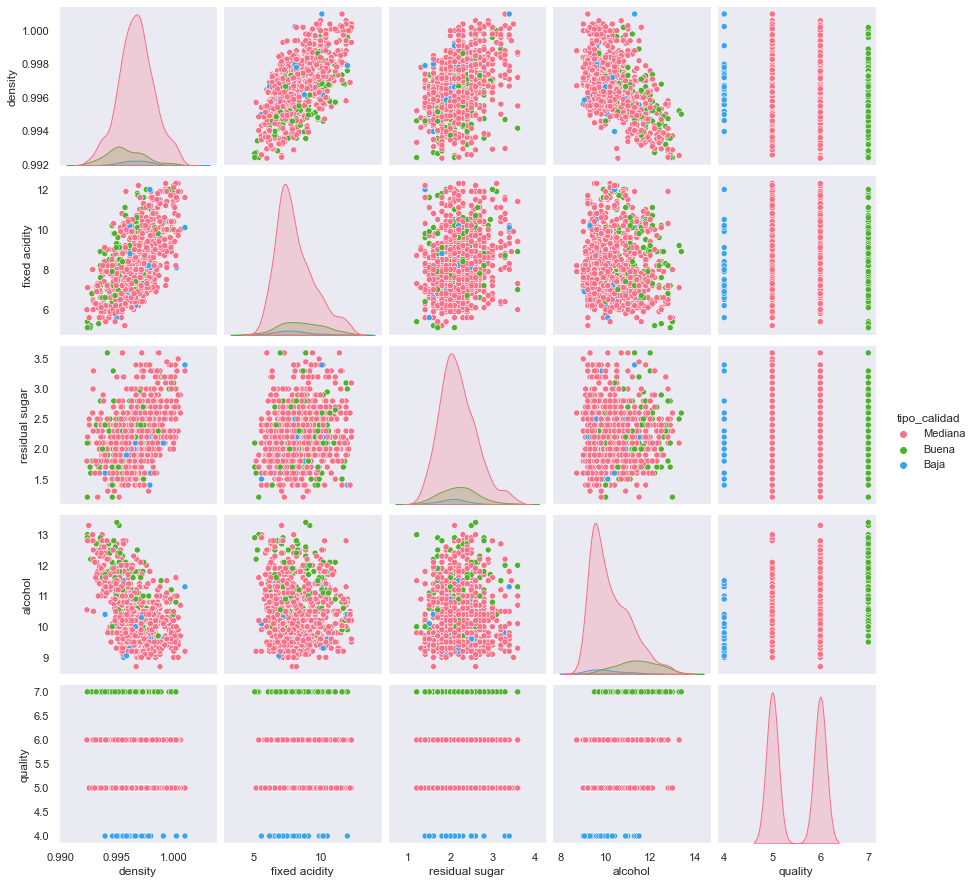

In [5]:
sns.pairplot(red_analysis, hue='tipo_calidad',palette="husl") 
plt.show()

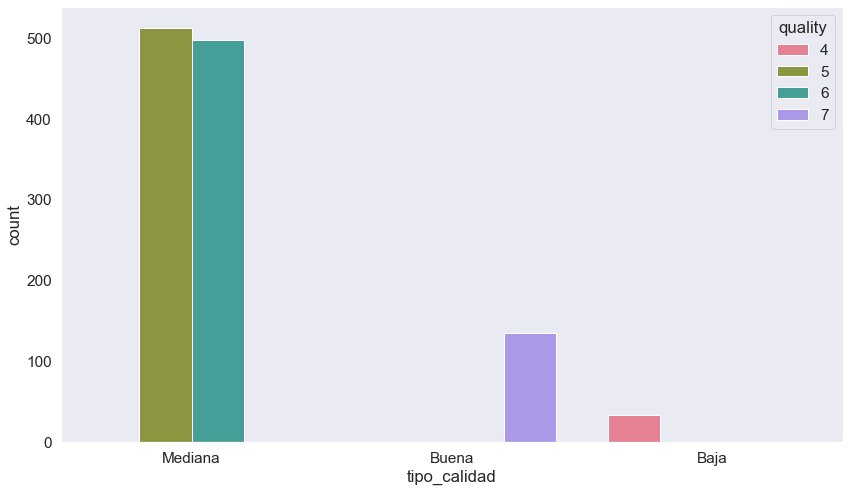

In [7]:
figure = plt.figure(figsize = (14,8))
sns.set_context("notebook", font_scale= 1.4)
sns.countplot(x="tipo_calidad",hue = 'quality', palette="husl",data=red_analysis)
plt.show()

In [8]:
#las calidades más representadas son los vinos de calidad 5,6 y 7
calidad_5 = pd.DataFrame(data=red_analysis[red_analysis.quality==5], 
                     columns=['density', 'fixed acidity'])
calidad_6= pd.DataFrame(data=red_analysis[red_analysis.quality==6], 
                     columns=['density', 'fixed acidity'])
calidad_7 = pd.DataFrame(data=red_analysis[red_analysis.quality==7], 
                     columns=['density', 'fixed acidity'])

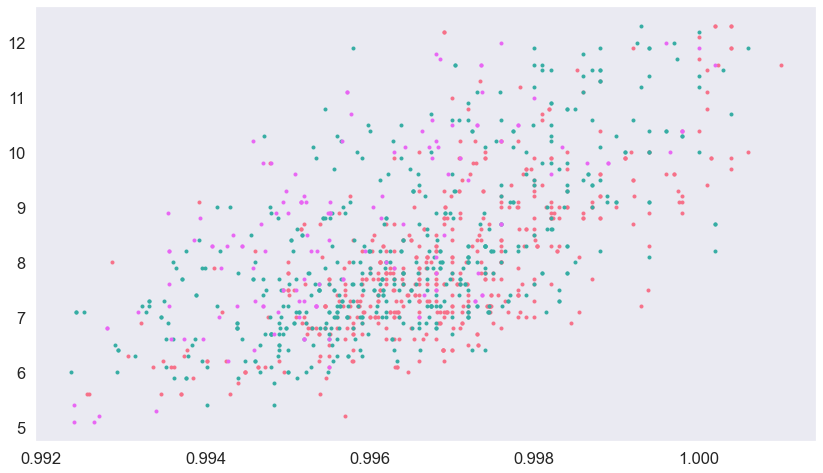

In [9]:
#Se graficarán las 3 calidades para ver qué tan separadas están
figure = plt.figure(figsize = (14,8))
sns.set_context("notebook", font_scale= 1.5)
colores = sns.color_palette(palette='husl', n_colors=6, desat=None)#obtener los colores usados anteriormente
plt.plot(calidad_5['density'],calidad_5['fixed acidity'], '.', color = colores[0], label='5')
plt.plot(calidad_6['density'],calidad_6['fixed acidity'], '.', color = colores[3], label='6')
plt.plot(calidad_7['density'],calidad_7['fixed acidity'], '.', color = colores[5], label='7')
plt.show()

In [10]:
def minimos_cuadrados(x,y):  
    m = len(x) #len() mide el largo del vector
    sumax = np.sum(x)
    sumay = np.sum(y)
    sumax2 = np.sum(x**2) # cada termino al cuadrado se suma
    sumaxy = np.dot(x,y) # producto punto entre x e y
    a = (m*sumaxy - sumax*sumay) / (m*sumax2 - sumax**2)
    b = (sumax2*sumay - sumaxy*sumax) / (m*sumax2 - sumax**2)
    return a,b

In [11]:
#obtener el ajuste de mínimos cuadrados para los 3 conjuntos de datos
a5,b5 = minimos_cuadrados(calidad_5['density'],calidad_5['fixed acidity'])
a6,b6 = minimos_cuadrados(calidad_6['density'],calidad_6['fixed acidity'])
a7,b7 = minimos_cuadrados(calidad_7['density'],calidad_7['fixed acidity'])

x = np.linspace(0.988,1.004)
y5 = a5*x + b5 
y6 = a6*x + b6
y7 = a7*x + b7

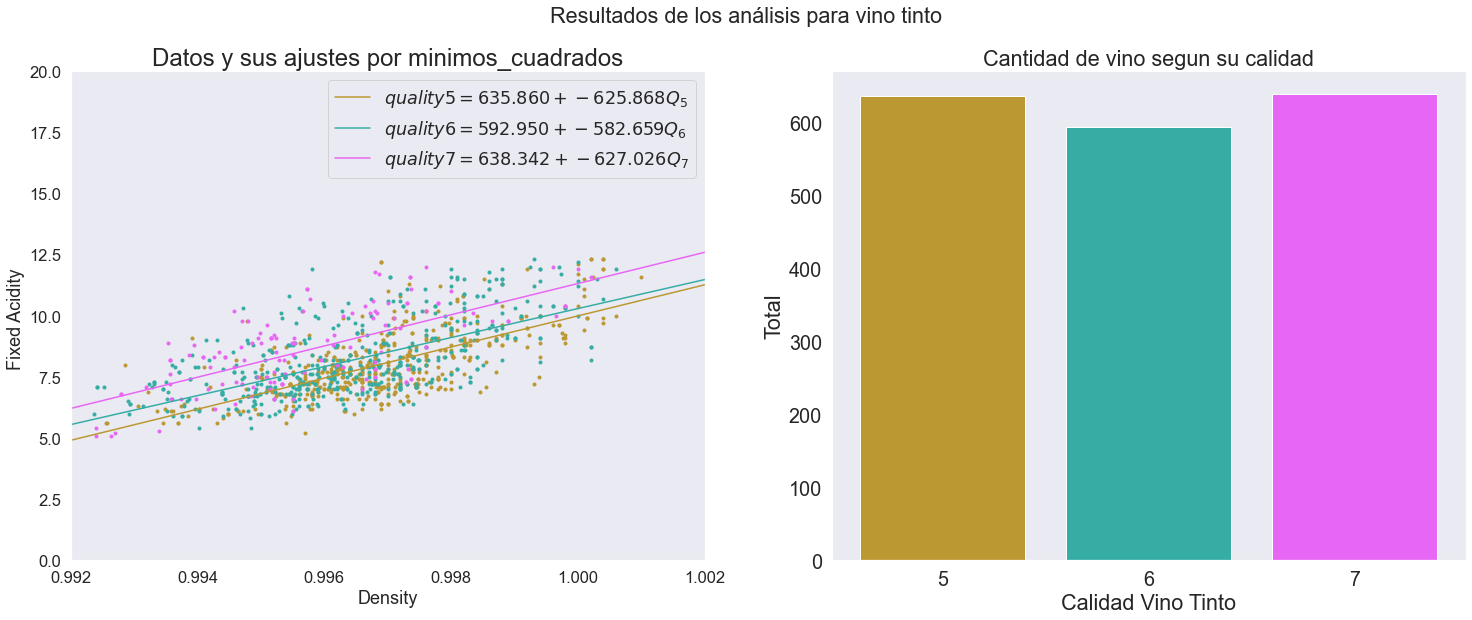

In [12]:
plt.figure(figsize=(25,9))#figura de tamaño 15x5
plt.suptitle("Resultados de los análisis para vino tinto")#titulo general
plt.subplot(121) #figura con 2 gráficos. 1º gráfico

#graficar las nubes de puntos
sns.set_context("notebook", font_scale= 2.0)
plt.title('Datos y sus ajustes por minimos_cuadrados')
plt.plot(calidad_5['density'],calidad_5['fixed acidity'], '.', color = colores[1], label='')
plt.plot(calidad_6['density'],calidad_6['fixed acidity'], '.', color = colores[3],label='')
plt.plot(calidad_7['density'],calidad_7['fixed acidity'], '.', color = colores[5],label='')

#graficar los ajustes
sns.set_context("notebook", font_scale= 1.6)
plt.plot(x,y5, '-', color = colores[1],label='$quality5 = %0.3f + %0.3f  $'%(a5,b5))
plt.plot(x,y6, '-', color = colores[3],label='$quality6 = %0.3f + %0.3f  $'%(a6,b6))
plt.plot(x,y7, '-', color = colores[5],label='$quality7 = %0.3f + %0.3f  $'%(a7,b7))
plt.xlabel('Density')#etiquetar correctamente los gráficos
plt.ylabel('Fixed Acidity ')
plt.legend() #agregar leyenda al gráfico
plt.xlim(0.992,1.002)#ordenar el rango a mostrar
plt.ylim(0,20)

sns.set_context("notebook", font_scale=1.8)#2º gráfico
plt.subplot(122)
plt.title('Cantidad de vino segun su calidad')
plt.bar([5,6,7], [a5,a6,a7], color = [colores[1], colores[3], colores[5]])
plt.xlabel('Calidad Vino Tinto')
plt.ylabel('Total')
plt.xticks([5,6,7])
plt.show()

In [ ]:
red_analysis.to_csv('data/more_analytic_wine_red.csv', index = False)

In [13]:
red_analysis

,density,fixed acidity,residual sugar,alcohol,quality,tipo_calidad
0,0.99780,7.4,1.9,9.4,5,Mediana
1,0.99680,7.8,2.6,9.8,5,Mediana
2,0.99700,7.8,2.3,9.8,5,Mediana
3,0.99800,11.2,1.9,9.8,6,Mediana
4,0.99780,7.4,1.9,9.4,5,Mediana
...,...,...,...,...,...,...
1174,0.99490,6.2,2.0,10.5,5,Mediana
1175,0.99512,5.9,2.2,11.2,6,Mediana
1176,0.99574,6.3,2.3,11.0,6,Mediana
1177,0.99547,5.9,2.0,10.2,5,Mediana
